# **Captone Project-Introduction to Deep Learning **
Aniruddha Banerjee


# **Ecommerce customer satisfaction Score**
# Project Overview
The customer satisfaction plays a vital role in the ecommerce industry.In order to enhance the business and know about how much a customer is satisfied with the service of any ecommerce platform it is very import to have a track of the customer reviews.
This proect is based on customer satisfaction of a ecommerce company.In this a dataset there are 85907 rows and 20 columns.We have performed EDA in order to get insights that can benefit the organisation.After this we have performed the basic oprations like filling the missing values ,removing the duplicate values if any.The next step was to drop the unnecessary columns from our dataset followed by one hot encoding on the remaining columns and then performed the train test split on the dataset and then we applied the ANN model and derivedd the necessary insights from it.

# **Problem Statement**


The primary goal of this project is to develop a deep learning model that can accurately predict the CSAT scores based on customer interactions and feedback. By doing so, we aim to provide e-commerce businesses with a powerful tool to monitor and enhance customer satisfaction in real-time, thereby improving service quality and fostering customer loyalty

# ***Let's Begin !***

### Importing Necessary  Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from matplotlib import  pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading the eCommerce csv

In [ ]:
# Load Dataset
df=pd.read_csv('/content/drive/MyDrive/eCommerce_Customer_support_data.csv')

**General Inspection**

In [ ]:
# Dataset First Look
df.sample(5)

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
39546,818f816d-5d1b-4610-9e04-afce84bda2fa,Inbound,Returns,Reverse Pickup Enquiry,Costumer care so like 10 to 10,NaN,NaN,14/08/2023 11:32,14/08/2023 11:34,14-Aug-23,NaN,NaN,NaN,NaN,Latoya Blair,Olivia Suzuki,John Smith,31-60,Morning,5
33907,57186ff4-aa04-4b24-97db-ccbf126725a0,Inbound,Payments related,Wallet related,NaN,NaN,NaN,12/08/2023 13:47,12/08/2023 14:00,12-Aug-23,NaN,NaN,NaN,NaN,Nicholas Mata,Wyatt Kim,Michael Lee,61-90,Afternoon,5
27219,46dae745-c79d-49a6-9846-b81272c22884,Inbound,Order Related,Invoice request,NaN,cd70c4de-edba-4acd-bcd1-fc7cad2997da,14/07/2023 10:25,11/08/2023 11:06,11/08/2023 11:13,11-Aug-23,SILIGURI,Electronics,1499.0,NaN,Mark Cook,Zoe Yamamoto,William Kim,On Job Training,Morning,5
7395,44312839-7185-4d88-88ce-e3e3b0412b2c,Email,Refund Related,Refund Enquiry,NaN,NaN,NaN,04/08/2023 19:52,04/08/2023 20:24,04-Aug-23,NaN,NaN,NaN,NaN,Mary Hughes,Elijah Yamaguchi,Emily Chen,61-90,Evening,5
39963,e8bd319e-69f8-477f-928a-681f9bfea67a,Inbound,Returns,Reverse Pickup Enquiry,NaN,NaN,NaN,15/08/2023 16:03,15/08/2023 16:09,15-Aug-23,NaN,NaN,NaN,NaN,Tina Harrington,Carter Park,Michael Lee,>90,Morning,5


In [ ]:
# Dataset Rows & Columns count
df.shape

(85907, 20)

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Inspecting Duplicate Values and Null Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

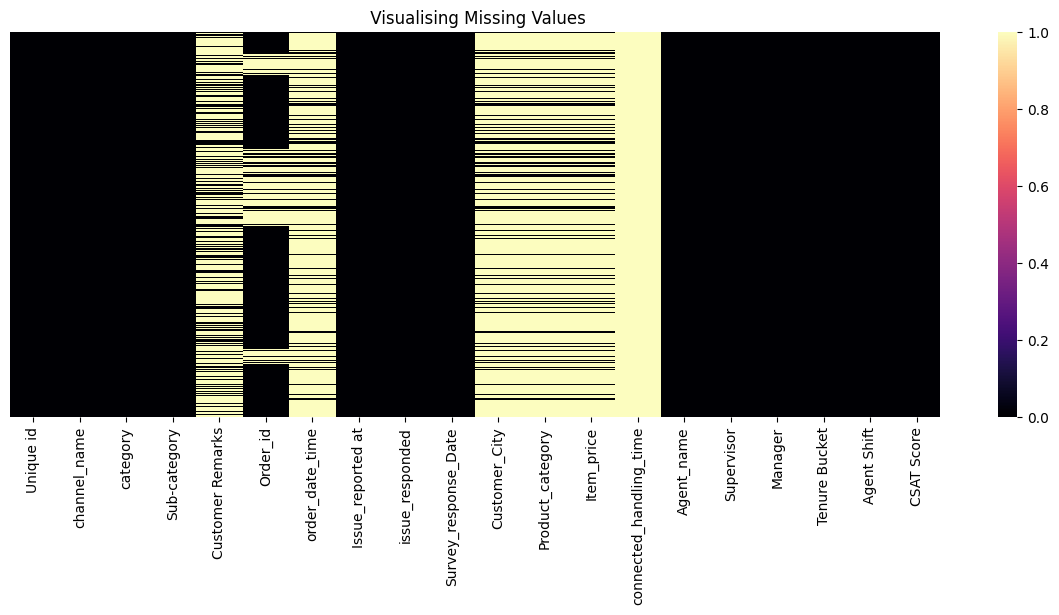

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap='magma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
list(df)

['Unique id',
 'channel_name',
 'category',
 'Sub-category',
 'Customer Remarks',
 'Order_id',
 'order_date_time',
 'Issue_reported at',
 'issue_responded',
 'Survey_response_Date',
 'Customer_City',
 'Product_category',
 'Item_price',
 'connected_handling_time',
 'Agent_name',
 'Supervisor',
 'Manager',
 'Tenure Bucket',
 'Agent Shift',
 'CSAT Score']

In [ ]:
# Dataset Describe
df.describe(include='all')

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
count,85907,85907,85907,85907,28742,67675,17214,85907,85907,85907,17079,17196,17206.000000,242.000000,85907,85907,85907,85907,85907,85907.000000
unique,85907,3,12,57,18231,67675,13766,30923,30262,31,1782,9,NaN,NaN,1371,40,6,5,5,NaN
top,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Inbound,Returns,Reverse Pickup Enquiry,Good,c27c9bb4-fa36-4140-9f1f-21009254ffdb,09/08/2023 11:55,15/08/2023 10:59,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,NaN,NaN,Wendy Taylor,Carter Park,John Smith,>90,Morning,NaN
freq,1,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,NaN,NaN,429,4273,25261,30660,41426,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5660.774846,462.400826,NaN,NaN,NaN,NaN,NaN,4.242157
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12825.728411,246.295037,NaN,NaN,NaN,NaN,NaN,1.378903
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.000000,293.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.000000,427.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2699.750000,592.250000,NaN,NaN,NaN,NaN,NaN,5.000000


### Checking Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in df:
  print(df[column].unique())

['7e9ae164-6a8b-4521-a2d4-58f7c9fff13f'
 'b07ec1b0-f376-43b6-86df-ec03da3b2e16'
 '200814dd-27c7-4149-ba2b-bd3af3092880' ...
 '723bce2c-496c-4aa8-a64b-ca17004528f0'
 '707528ee-6873-4192-bfa9-a491f1c08ab5'
 '07c7a878-0d5a-42e0-97ef-de59abec0238']
['Outcall' 'Inbound' 'Email']
['Product Queries' 'Order Related' 'Returns' 'Cancellation'
 'Shopzilla Related' 'Payments related' 'Refund Related' 'Feedback'
 'Offers & Cashback' 'Onboarding related' 'Others' 'App/website']
['Life Insurance' 'Product Specific Information' 'Installation/demo'
 'Reverse Pickup Enquiry' 'Not Needed' 'Fraudulent User'
 'Exchange / Replacement' 'Missing' 'General Enquiry' 'Return request'
 'Delayed' 'Service Centres Related' 'Payment related Queries'
 'Order status enquiry' 'Return cancellation' 'Unable to track'
 'Seller Cancelled Order' 'Wrong' 'Invoice request' 'Priority delivery'
 'Refund Related Issues' 'Signup Issues' 'Online Payment Issues'
 'Technician Visit' 'UnProfessional Behaviour' 'Damaged'
 'Product rel

## 3. ***Data Wrangling***

In [ ]:
numerical_columns=[]
for col in df.columns:
  if df[col].nunique()>5:
    numerical_columns.append(col)
categorical_columns=list(set(df.columns)-set(numerical_columns))

In [ ]:
print(numerical_columns)

['Unique id', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor', 'Manager']


In [ ]:
print(categorical_columns)

['Tenure Bucket', 'CSAT Score', 'channel_name', 'Agent Shift']


# **Data Vizualization**

#### Histogram

In [ ]:
# Chart - 1 visualization code
import plotly.express as px
template="plotly_dark"
csat_graph = px.histogram(df, x='CSAT Score', title='Distribution of CSAT Scores',
                                     labels={'CSAT Score': 'CSAT Score'},
                                     color='CSAT Score',template=template)
csat_graph.update_layout(
    xaxis=dict(title='CSAT Score', tickmode='linear'),
    yaxis=dict(title='Count'),
    font=dict(family='Arial', size=12, color='white')
)

# Show interactive graph
csat_graph.show()

##### 1. Why did you pick the specific chart?


This chart will show the number of people who have provided each CSAT score, such as the number of customers who have rated the organization with a 5.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that most customers in the dataset have given the organization a rating of 5, indicating a high level of satisfaction with the services provided.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will definitely help create a positive business impact. Lower ratings can lead to negative growth by fostering a perception that the organization's services are subpar, resulting in high customer dissatisfaction.

#### Chart2

In [ ]:
# Chart - 2 visualization code
top_agents_csat_bar_fig = px.bar(df.groupby('Agent_name')['CSAT Score'].mean().reset_index().nlargest(10, 'CSAT Score'),
                                  x='Agent_name', y='CSAT Score', title='Top Agents by CSAT Score',
                                  labels={'Agent_name': 'Agent Name', 'CSAT Score': 'Average CSAT Score'},
                                  color='CSAT Score',template=template)
top_agents_csat_bar_fig.update_layout(font=dict(family='Arial', size=12, color='white'))

# Show interactive graph
top_agents_csat_bar_fig.show()

##### 1. Why did you pick the specific chart?


This chart provides information on customer service agents and the CSAT scores they have received.

##### 2. What is/are the insight(s) found from the chart?

The insight we gain will be the CSAT scores received by each customer service agent.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it will help in creating positive business impact.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
top_manager_csat_bar_fig = px.bar(df.groupby('Manager')['CSAT Score'].mean().reset_index().nlargest(10, 'CSAT Score'),
                                  x='Manager', y='CSAT Score', title='Top Managers by CSAT Score',
                                  labels={'Manager': 'Manager Name', 'CSAT Score': 'Average CSAT Score'},
                                  color='CSAT Score', template=template)
top_manager_csat_bar_fig.update_layout(font=dict(family='Arial', size=12, color='white'))

# Show interactive graph
top_manager_csat_bar_fig.show()

##### 1. Why did you pick the specific chart?

This chart will give information about the managers and the CSAT score they the received from the customers.

##### 2. What is/are the insight(s) found from the chart?

This chart gives the insight that under which manager's leadership skill the CSAT score is the highest and in future his/her managerial skills can be used for enhancing the business.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it will help in creating positive impact on business.
A manager will lower CSAT score can lead to loss in any organisation ,so he/she has to brushup the skills in order to create a positive impact on customers.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
best_tenure_csat_bar_fig = px.bar(df.groupby('Tenure Bucket')['CSAT Score'].mean().reset_index().nlargest(10, 'CSAT Score'),
                                  x='Tenure Bucket', y='CSAT Score', title='Best Tenure by CSAT Score',
                                  labels={'Tenure Bucket': 'Tenure Duration', 'CSAT Score': 'Average CSAT Score'},
                                  color='CSAT Score', template=template)
best_tenure_csat_bar_fig.update_layout(font=dict(family='Arial', size=12, color='white'))

# Show interactive graph
best_tenure_csat_bar_fig.show()

##### 1. Why did you pick the specific chart?

This chart will give imformation about the tenure of the agents.

##### 2. What is/are the insight(s) found from the chart?

It gives the information about the tenure of the agents.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it will help in creating positive impact on business.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
best_channel_csat_bar_fig = px.bar(df.groupby('channel_name')['CSAT Score'].mean().reset_index().nlargest(10, 'CSAT Score'),
                                  x='channel_name', y='CSAT Score', title='Best channel by CSAT Score',
                                  labels={'channel_name': 'Channel name', 'CSAT Score': 'Average CSAT Score'},
                                  color='CSAT Score', template=template)
best_tenure_csat_bar_fig.update_layout(font=dict(family='Arial', size=12, color='white'))

# Show interactive graph
best_channel_csat_bar_fig.show()

##### 1. Why did you pick the specific chart?

This chart is created to get information about various channels and the CSAT  score under each channel.

##### 2. What is/are the insight(s) found from the chart?

THe insight that we get from this is the channel through which the Highest CSAT score is received.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it will help in creating a positive business impact.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb


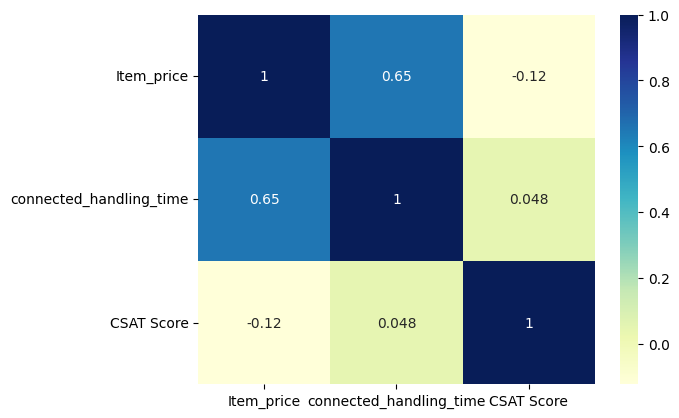

In [ ]:
# Correlation Heatmap visualization code
# Handle non-numerical columns before calculating correlation
# Drop non-numerical columns
df_numeric = df.select_dtypes(include=['number'])

# Or, if you want to keep the non-numerical columns, fill them with a placeholder value
# df_filled = df.fillna(0) # Replace NaN with 0, adjust as needed

# Correlation Heatmap visualization code
dataplot = sb.heatmap(df_numeric.corr(), cmap="YlGnBu", annot=True) # Use the modified DataFrame

# displaying heatmap
mp.show()

#### Chart - 15 - Pair Plot

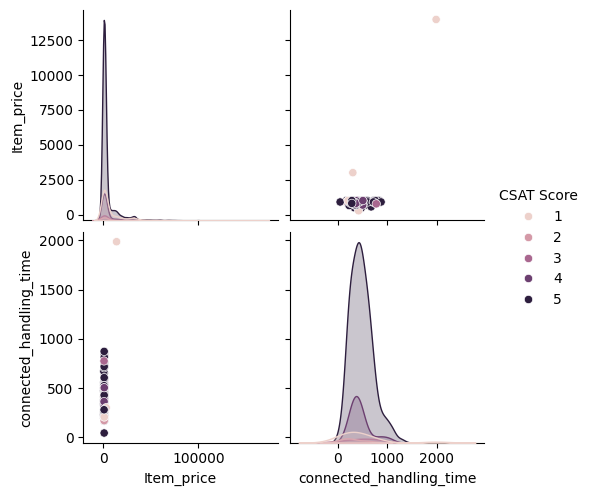

In [ ]:
# Pair Plot visualization code
sns.pairplot(df, hue="CSAT Score")

# **Feature Engineering & Data Pre-processing**

###  Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

In [ ]:
df_new = df.drop(["Customer Remarks", "Order_id", "order_date_time","Agent Shift","channel_name"], axis=1)

In [ ]:
df_new["Item_price"].fillna(df_new["Item_price"].median(), inplace=True)
df_new["connected_handling_time"].fillna(df_new["connected_handling_time"].median(), inplace=True)

In [ ]:
df_new["Customer_City"].fillna("Unknown", inplace=True)
df_new["Product_category"].fillna("Unknown", inplace=True)

In [ ]:
timestamp_columns = ["Issue_reported at", "issue_responded", "Survey_response_Date"]
for column in timestamp_columns:
    df_new[column] = pd.to_datetime(df_new[column], errors='coerce')

<ipython-input-39-f7c74a4893b8>:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [ ]:
for column in ["Issue_reported at", "issue_responded"]:
    df_new[column].fillna(df_new[column].median(), inplace=True)

In [ ]:
df_new.isna().sum()

Unique id                  0
category                   0
Sub-category               0
Issue_reported at          0
issue_responded            0
Survey_response_Date       0
Customer_City              0
Product_category           0
Item_price                 0
connected_handling_time    0
Agent_name                 0
Supervisor                 0
Manager                    0
Tenure Bucket              0
CSAT Score                 0
dtype: int64

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unique id                85907 non-null  object        
 1   category                 85907 non-null  object        
 2   Sub-category             85907 non-null  object        
 3   Issue_reported at        85907 non-null  datetime64[ns]
 4   issue_responded          85907 non-null  datetime64[ns]
 5   Survey_response_Date     85907 non-null  datetime64[ns]
 6   Customer_City            85907 non-null  object        
 7   Product_category         85907 non-null  object        
 8   Item_price               85907 non-null  float64       
 9   connected_handling_time  85907 non-null  float64       
 10  Agent_name               85907 non-null  object        
 11  Supervisor               85907 non-null  object        
 12  Manager                  85907 n

###  Categorical Encoding

In [ ]:
# Encode your categorical columns

df_new=df_new.drop(['Unique id','category','Sub-category','Issue_reported at','issue_responded','Survey_response_Date','Customer_City','Product_category','Item_price',
'Agent_name','Supervisor'],axis=1)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   connected_handling_time  85907 non-null  float64
 1   Manager                  85907 non-null  object 
 2   Tenure Bucket            85907 non-null  object 
 3   CSAT Score               85907 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.6+ MB


In [ ]:
one_hot=pd.get_dummies(df['Manager'] ,dtype=int)


In [ ]:
one_hot.head()

,Emily Chen,Jennifer Nguyen,John Smith,Michael Lee,Olivia Tan,William Kim
0,0,1,0,0,0,0
1,0,0,0,1,0,0
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,0,0,0,1,0,0


In [ ]:
df_new1=df_new.drop('Manager',axis=1)

In [ ]:
df_new1=df_new1.join(one_hot)

In [ ]:
df_new1

,connected_handling_time,Tenure Bucket,CSAT Score,Emily Chen,Jennifer Nguyen,John Smith,Michael Lee,Olivia Tan,William Kim
0,427.0,On Job Training,5,0,1,0,0,0,0
1,427.0,>90,5,0,0,0,1,0,0
2,427.0,On Job Training,5,0,0,0,0,0,1
3,427.0,>90,5,0,0,1,0,0,0
4,427.0,0-30,5,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
85902,427.0,On Job Training,4,0,0,0,0,0,1
85903,427.0,>90,5,1,0,0,0,0,0
85904,427.0,On Job Training,5,0,0,0,0,1,0
85905,427.0,>90,4,0,0,0,0,1,0


In [ ]:
one_hot1=pd.get_dummies(df_new1['Tenure Bucket'] ,dtype=int)


In [ ]:
one_hot1

,0-30,31-60,61-90,>90,On Job Training
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,0,1,0
4,1,0,0,0,0
...,...,...,...,...,...
85902,0,0,0,0,1
85903,0,0,0,1,0
85904,0,0,0,0,1
85905,0,0,0,1,0


In [ ]:
df_new2=df_new1.drop('Tenure Bucket',axis=1)

In [ ]:
df_new2=df_new2.join(one_hot1)

In [ ]:
df_new2

,connected_handling_time,CSAT Score,Emily Chen,Jennifer Nguyen,John Smith,Michael Lee,Olivia Tan,William Kim,0-30,31-60,61-90,>90,On Job Training
0,427.0,5,0,1,0,0,0,0,0,0,0,0,1
1,427.0,5,0,0,0,1,0,0,0,0,0,1,0
2,427.0,5,0,0,0,0,0,1,0,0,0,0,1
3,427.0,5,0,0,1,0,0,0,0,0,0,1,0
4,427.0,5,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85902,427.0,4,0,0,0,0,0,1,0,0,0,0,1
85903,427.0,5,1,0,0,0,0,0,0,0,0,1,0
85904,427.0,5,0,0,0,0,1,0,0,0,0,0,1
85905,427.0,4,0,0,0,0,1,0,0,0,0,1,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

One hot encoding technique is used here.

### Splitting into Train and Test data

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

from sklearn.model_selection import train_test_split

In [ ]:
features = ['CSAT Score','Jennifer Nguyen','John Smith','Michael Lee','Olivia Tan','William Kim','connected_handling_time','0-30','31-60','61-90','>90','On Job Training']
X = df_new2.loc[:, features]
y = df_new2.loc[:, ['Emily Chen']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [ ]:
X_train

,CSAT Score,Jennifer Nguyen,John Smith,Michael Lee,Olivia Tan,William Kim,connected_handling_time,0-30,31-60,61-90,>90,On Job Training
64804,5,0,0,0,0,1,427.0,0,0,0,0,1
61026,5,0,0,0,0,0,427.0,0,0,1,0,0
50439,4,0,0,0,0,0,427.0,0,0,0,1,0
67304,5,0,0,1,0,0,427.0,0,1,0,0,0
52096,4,0,0,1,0,0,427.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21243,5,0,0,0,0,0,427.0,0,1,0,0,0
45891,5,0,0,0,1,0,427.0,0,0,0,1,0
42613,5,0,1,0,0,0,427.0,1,0,0,0,0
43567,5,1,0,0,0,0,427.0,0,0,0,0,1


# **ML Model Implementation**

### ML Model

In [ ]:
# ML Model - 1 Implementation
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential

# Fit the Algorithm

# Predict on the model

In [ ]:
model=keras.Sequential([
      keras.layers.Dense(30,activation='tanh'),

      keras.layers.Dense(15,activation='tanh'),

      keras.layers.Dense(1,activation='relu')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=25)

Epoch 1/25
2014/2014 [==============================] - 5s 2ms/step - loss: 2.5322 - accuracy: 0.8358
Epoch 2/25
2014/2014 [==============================] - 5s 2ms/step - loss: 2.5322 - accuracy: 0.8358
Epoch 3/25
2014/2014 [==============================] - 4s 2ms/step - loss: 2.5322 - accuracy: 0.8358
Epoch 4/25
2014/2014 [==============================] - 4s 2ms/step - loss: 2.5322 - accuracy: 0.8358
Epoch 5/25
2014/2014 [==============================] - 5s 2ms/step - loss: 2.5322 - accuracy: 0.8358
Epoch 6/25
2014/2014 [==============================] - 4s 2ms/step - loss: 2.5322 - accuracy: 0.8358
Epoch 7/25
2014/2014 [==============================] - 4s 2ms/step - loss: 2.5322 - accuracy: 0.8358
Epoch 8/25
2014/2014 [==============================] - 4s 2ms/step - loss: 2.5322 - accuracy: 0.8358
Epoch 9/25
2014/2014 [==============================] - 5s 3ms/step - loss: 2.5322 - accuracy: 0.8358
Epoch 10/25
2014/2014 [==============================] - 4s 2ms/step - loss: 2.532

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 871 (3.40 KB)
Trainable params: 871 (3.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***